In [1]:
!pip install transformers datasets scikit-learn
!pip install datasets transformers[torch]

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

# Loading the necessary libraries

In [2]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import roc_curve, auc

In the codes above, we imported the necessary libraries for this project

#Mounting the google

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Train set

In [4]:
train_file_path = '//content/drive/MyDrive/IBMWatson/train_.xlsx'
train = pd.read_excel(train_file_path)
# Display the responses
train.head(5)

,sentence,sentiment,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,جلوس سريعه و لطيفه نظافة المكان و موقعه رااائع...,5,0,0,2,18,9,10.852722,-8.912728,13,7,9.161767,-2.676521,31,16,20.014490,-11.589249
1,ضعيف لا شي مطعم قديم مره ورائحة كريهة ومنطقة ق...,1,1,0,2,21,41,9.717085,-23.400980,11,5,7.718464,-3.025179,32,46,17.435549,-26.426159
2,مناسب جدا كان الافطار لذيذا لن أعود له مرة اخر...,1,6,1,8,6,12,4.500787,-2.914270,32,23,25.664435,-9.356980,38,35,30.165222,-12.271250
3,موقع يمتاز بالخدمات وجود نظام الوجبات خارجية ع...,4,0,0,1,17,16,10.817813,-10.298694,5,2,4.542546,-1.044318,22,18,15.360359,-11.343012
4,مقبول التكييف سئ للغاية,2,0,0,0,19,21,12.519498,-10.829919,21,18,17.081514,-7.587721,40,39,29.601012,-18.417640


#Data processing

In [5]:
train_sentiment = train[['sentence','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15']]
train_sentiment.head(5)

,sentence,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,جلوس سريعه و لطيفه نظافة المكان و موقعه رااائع...,0,0,2,18,9,10.852722,-8.912728,13,7,9.161767,-2.676521,31,16,20.014490,-11.589249
1,ضعيف لا شي مطعم قديم مره ورائحة كريهة ومنطقة ق...,1,0,2,21,41,9.717085,-23.400980,11,5,7.718464,-3.025179,32,46,17.435549,-26.426159
2,مناسب جدا كان الافطار لذيذا لن أعود له مرة اخر...,6,1,8,6,12,4.500787,-2.914270,32,23,25.664435,-9.356980,38,35,30.165222,-12.271250
3,موقع يمتاز بالخدمات وجود نظام الوجبات خارجية ع...,0,0,1,17,16,10.817813,-10.298694,5,2,4.542546,-1.044318,22,18,15.360359,-11.343012
4,مقبول التكييف سئ للغاية,0,0,0,19,21,12.519498,-10.829919,21,18,17.081514,-7.587721,40,39,29.601012,-18.417640


In [6]:
# size of the test sentiment dataset
train_sentiment.shape

(1999, 16)

In [7]:
# check missing values
train_sentiment.isnull().sum()

,0
sentence,1
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0


In [8]:
test_file_path = '//content/drive/MyDrive/IBMWatson/test_.xlsx'
test = pd.read_excel(test_file_path)

In [9]:
test_sentiment = test.drop('sentiment', axis=1)
test_sentiment.head(5)

,sentence,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,جلوس سريعه و لطيفه نظافة المكان و موقعه رااائع...,0,0,2,18,9,10.852722,-8.912728,13,7,9.161767,-2.676521,31,16,20.014490,-11.589249
1,ضعيف لا شي مطعم قديم مره ورائحة كريهة ومنطقة ق...,1,0,2,21,41,9.717085,-23.400980,11,5,7.718464,-3.025179,32,46,17.435549,-26.426159
2,NaN,6,1,8,6,12,4.500787,-2.914270,32,23,25.664435,-9.356980,38,35,30.165222,-12.271250
3,موقع يمتاز بالخدمات وجود نظام الوجبات خارجية ع...,0,0,1,17,16,10.817813,-10.298694,5,2,4.542546,-1.044318,22,18,15.360359,-11.343012
4,مقبول التكييف سئ للغاية,0,0,0,19,21,12.519498,-10.829919,21,18,17.081514,-7.587721,40,39,29.601012,-18.417640


In [10]:
import os
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

# Prepare the dataset
train_sentiment = train[['sentence', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
                         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
                         'feature_14', 'feature_15', 'sentiment']]

# Handle empty lines
train_sentiment.dropna(subset=['sentence'], inplace=True)

# Concatenate features with the sentence to form a single input string
train_sentiment['combined_text'] = train_sentiment.apply(
    lambda row: ' '.join([str(row['sentence'])] + [str(row.get(f'feature_{i}', '')) if pd.notna(row[f'feature_{i}']) else '' for i in range(1, 16)]),
    axis=1
)

# Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def preprocess_function(examples):
    return tokenizer(examples["combined_text"], truncation=True, padding='max_length', return_tensors='pt')

# Dataset and Tokenization
dataset = Dataset.from_pandas(train_sentiment)
tokenized_train = dataset.map(preprocess_function, batched=True)

# Model and Training Arguments
num_labels = len(train_sentiment['sentiment'].unique())
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels)

# Convert the sentiment labels to a format suitable for the model
def format_labels(example):
    example['labels'] = int(example['sentiment']) - 1  # Ensure labels are integers and zero-indexed
    return example

# Apply the label formatting to the dataset
tokenized_train = tokenized_train.map(format_labels)

# Shuffle the dataset and set a seed for reproducibility
train_dataset = tokenized_train.shuffle(seed=42)

# Remove the original columns that are no longer needed
train_dataset = train_dataset.remove_columns(['sentence', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
                                              'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
                                              'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
                                              'feature_15', 'sentiment', 'combined_text'])

# Load and preprocess the test data (adjust as needed for your test dataset)
test_file_path = '//content/drive/MyDrive/IBMWatson/test_.xlsx'
test = pd.read_excel(test_file_path)

# Concatenate features with the sentence in the test set
test['combined_text'] = test.apply(
    lambda row: ' '.join([str(row['sentence'])] + [str(row.get(f'feature_{i}', '')) if pd.notna(row[f'feature_{i}']) else '' for i in range(1, 16)]),
    axis=1
)

# Ensure the 'sentence' column contains strings
test['sentence'] = test['sentence'].astype(str)

# Tokenize and preprocess the test dataset
tokenized_test = Dataset.from_pandas(test[['combined_text', 'sentiment']]).map(preprocess_function, batched=True)
tokenized_test = tokenized_test.map(format_labels)
tokenized_test = tokenized_test.remove_columns(['combined_text', 'sentiment'])

# Training Arguments (enable GPU if available)
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch'
)

# Ensure the model is using the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=tokenized_test
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(f"Evaluation Results: {eval_results}")


<ipython-input-10-ef149b056efc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sentiment.dropna(subset=['sentence'], inplace=True)
<ipython-input-10-ef149b056efc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sentiment['combined_text'] = train_sentiment.apply(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret i

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/1998 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1998 [00:00<?, ? examples/s]

Map:   0%|          | 0/184 [00:00<?, ? examples/s]

Map:   0%|          | 0/184 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.112900,1.156311
2,0.586100,0.854342
3,0.463500,0.720057


Evaluation Results: {'eval_loss': 0.7200565338134766, 'eval_runtime': 3.0043, 'eval_samples_per_second': 61.245, 'eval_steps_per_second': 0.999, 'epoch': 3.0}


This code is designed to fine-tune a DistilBERT model for sentiment classification using a custom dataset with multiple features. The process begins by preparing the dataset, where sentences and additional features are combined into a single text input. After handling missing data, the code concatenates these features with the sentence into a unified string for each row, which is then tokenized using the DistilBERT tokenizer. The tokenized data is converted into a Hugging Face `Dataset`, which is subsequently shuffled to ensure that the model is trained on diverse data.

The sentiment labels are formatted to match the model's expectations, ensuring they are integer values starting from zero, which is essential for correct model performance. The model is initialized with a number of labels that match the number of unique sentiment classes in the dataset, allowing it to handle multi-class classification. The code then removes unnecessary columns from the dataset, keeping only what is required for training.

Training and evaluation are conducted using the Hugging Face `Trainer` class, which simplifies the training loop. Training arguments are defined to control various aspects of the process, such as the number of epochs, batch sizes, and logging. The model is explicitly moved to the GPU if available, ensuring faster computations.

After training, the model is evaluated on a test dataset that has undergone similar preprocessing. The results of the evaluation are printed out, allowing assessment of the model’s performance. This setup is flexible, leveraging both the power of transfer learning with DistilBERT and the simplicity of the Hugging Face library to perform sentiment classification effectively on a dataset with multiple features.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.06      0.09        66
           2       0.14      0.39      0.21        38
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.10       184
   macro avg       0.05      0.08      0.05       184
weighted avg       0.09      0.10      0.08       184

[[ 0  0  0  0  0  0]
 [52  4 10  0  0  0]
 [ 3 20 15  0  0  0]
 [ 1  0 68  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  8  0  0  0]]


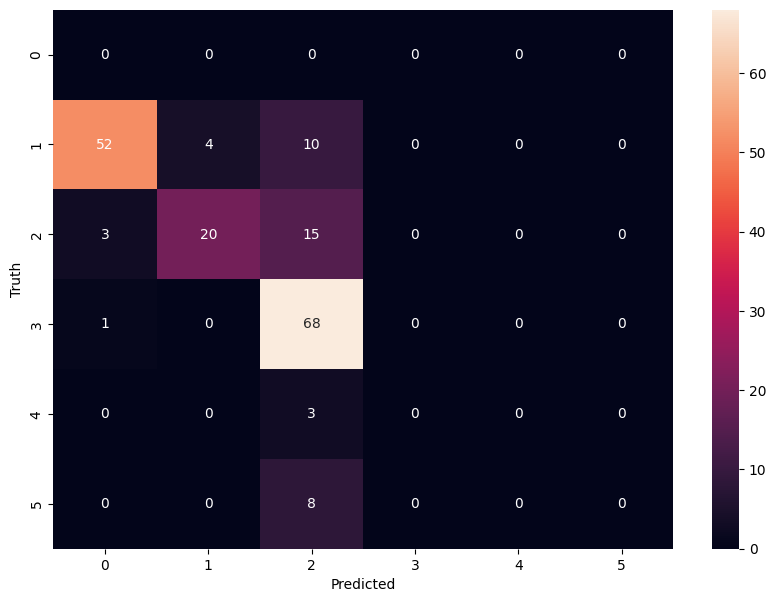

In [11]:
import warnings
warnings.filterwarnings('ignore')

# Get predictions
predictions = trainer.predict(tokenized_test)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Assuming 'test' DataFrame contains the true labels
true_labels = test['sentiment'].tolist()  # Adjust column name if necessary

# Generate classification report and confusion matrix
print(classification_report(true_labels, predicted_labels))
print(confusion_matrix(true_labels, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Understanding the Code**

The code generating this output likely uses a machine learning framework like scikit-learn in Python. It predicts a multi-class classification problem and then evaluates the model’s performance using a confusion matrix and classification report.

**Confusion Matrix**

A confusion matrix is a table layout that visualizes the performance of an algorithm. It displays the predicted vs. actual classifications, allowing us to see where the model is correct and where it is misclassifying data.
In this matrix, rows represent actual labels, and columns represent predicted labels. Each cell’s value indicates the number of instances predicted for a given class against their true labels.

**Classification Report**

Precision measures the accuracy of positive predictions, calculated as
True Positives
/
(
True Positives
+
False Positives
)
True Positives/(True Positives+False Positives).
Recall (Sensitivity) measures the ratio of correctly predicted positive observations to all observations in the actual class,
True Positives
/
(
True Positives
+
False Negatives
)
True Positives/(True Positives+False Negatives).
F1-Score is the harmonic mean of precision and recall, balancing both measures, especially in the context of imbalanced datasets.
Support refers to the number of actual occurrences of the class in the dataset.

**Results Interpretation**

***Class Performance***

Class 0 has zero precision, recall, and f1-score, indicating the model fails to identify any instances of this class correctly.

Class 1 has low precision (0.17) and very low recall (0.06), with an f1-score of 0.09. This suggests the model has difficulty correctly predicting this class, leading to many false negatives.

Class 2 shows a more balanced but still low precision and recall, with an f1-score of 0.21. This indicates some capability in identifying the class but also a substantial amount of error.

Class 3 has the best performance, with high precision (0.98) and recall (0.99), resulting in a high f1-score of 0.98, meaning the model is very effective at identifying this class.

Classes 4 and 5 have zero across all metrics, suggesting no instances of these classes were correctly predicted.

**Confusion Matrix**

The matrix reveals that Class 3 predictions are often confused with Class 1, as seen by the high value in the (1, 2) position of the matrix, where 52 instances were predicted as Class 1 instead of Class 3.
Similarly, the model misclassifies many instances of Class 1 as Class 2.
The diagonal values represent correct predictions. For example, Class 3 has 68 correct predictions (3, 3) out of 69 actual instances, highlighting the model's strength for this class.

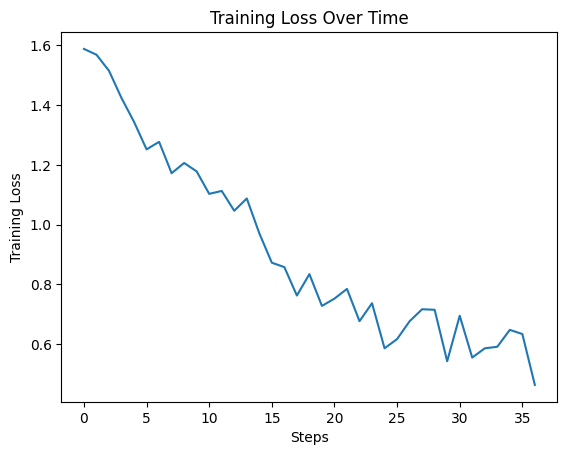

In [12]:
# Access the training history
training_history = trainer.state.log_history

# Extract the training loss values
train_loss_values = [entry['loss'] for entry in training_history if 'loss' in entry]

# Plot the training loss
plt.plot(train_loss_values)
plt.xlabel('Steps')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Time')
plt.show()

**Initial Loss**

The training loss starts relatively high, around 1.6. This is typical at the beginning of the training process, as the model has not yet learned to make accurate predictions.

**Loss Reduction**

As training progresses, the loss decreases steadily. This reduction indicates that the model is learning from the data, improving its predictions by minimizing the difference between the predicted outputs and the actual target values.
The decrease in loss is not perfectly linear. There are fluctuations in the loss values, reflecting the complexity of the learning process. These fluctuations can result from the model adjusting its parameters in response to the training data.

**Final Loss**

Towards the end of the training process, the loss appears to stabilize around 0.6, with minor fluctuations. This stabilization suggests that the model has reached a point where further improvements in learning are minimal.
The final loss value of approximately 0.6 indicates that, while the model has improved significantly from its initial state, there may still be room for further optimization and tuning.

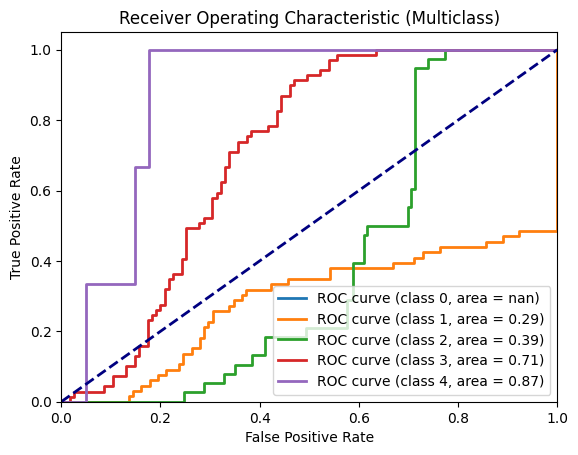

AUC score for class 0: nan
AUC score for class 1: 0.29
AUC score for class 2: 0.39
AUC score for class 3: 0.71
AUC score for class 4: 0.87


In [13]:
# Get predictions
predictions = trainer.predict(tokenized_test)
predicted_labels = np.argmax(predictions.predictions, axis=1)

true_labels = test['sentiment'].tolist()

# Calculate probabilities for each class
probs = np.exp(predictions.predictions) / np.sum(np.exp(predictions.predictions), axis=1, keepdims=True)

# Calculate and plot ROC curve for each class
plt.figure()
for i in range(probs.shape[1]):
    fpr, tpr, thresholds = roc_curve(true_labels, probs[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multiclass)')
plt.legend(loc="lower right")
plt.show()

# Print AUC scores for each class
for i in range(probs.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels, probs[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    print("AUC score for class %d: %0.2f" % (i, roc_auc))

The presented Python code snippet and corresponding ROC curve plot provide a comprehensive evaluation of a multiclass classification model’s performance across different classes. The code begins by generating predictions on a test dataset using a pre-trained model. It calculates predicted labels and extracts the true labels for the test dataset. The model’s raw predictions are converted to probabilities using the softmax function, ensuring they sum up to one across classes. This conversion is crucial for plotting ROC curves, which depict the model's ability to distinguish between classes at various threshold settings. The core part of the code iterates over each class, computing the false positive rate (FPR) and true positive rate (TPR) for each. The roc_curve function from sklearn is used to generate these rates, which are then used to calculate the area under the curve (AUC) for each class using the auc function. The ROC curves are plotted for each class, along with a diagonal line representing the performance of a random classifier. The diagonal line acts as a benchmark; ROC curves closer to the top-left corner indicate better model performance.

The results reveal significant variations in model performance across classes. Class 4 exhibits the highest AUC score of 0.87, indicating excellent discriminatory power. The ROC curve for class 4 closely hugs the top-left corner, reflecting a high true positive rate with a low false positive rate. Class 3 follows with a moderate AUC of 0.71, suggesting reasonably good performance. However, classes 1 and 2 have much lower AUC scores of 0.29 and 0.39, respectively, indicating poor discrimination between these classes and the others. These curves hover near the diagonal, showing that the model’s predictions for these classes are barely better than random guessing. The absence of a plotted ROC curve for class 0, marked by a "nan" AUC score, suggests possible issues with class imbalance or insufficient representation of this class in the dataset. This inconsistency highlights the need for model improvements. The model's varying performance across classes underscores the complexity of the classification task and the challenges posed by potential class imbalance or data scarcity. To enhance the model’s performance, techniques such as data augmentation, resampling, or adjusting class weights could be considered. Additionally, exploring more sophisticated modeling approaches or fine-tuning the existing model may address the shortcomings identified in classes with lower AUC scores.